In [110]:
import numpy as np
import pandas as pd
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


In [111]:
def choose_k(dataframe):
	k = int(math.sqrt(dataframe.shape[0]))
	if k % 2 == 0:
		k = k + 1
	
	return k

In [112]:
data = pd.read_csv('data/breast-cancer.csv')
df = pd.DataFrame(data)
columns = df.columns
# benign or malignant 0 - benign ( non cancerous) 1 - maligant ( cancerous )


In [113]:
for x in range(1,len(columns)):
    print(df[columns[x]].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[0 1]


Seeing that column 6 has strings and also '?', this needs to be fixed

In [114]:
# Columns 6 has a ? as value, need to remove this row (s)
df[columns[6]].unique()
# columns[6] is bare_nuclei, dropping columns
df.drop(df[df.bare_nuclei == '?'].index, inplace=True)

df['bare_nuclei'] = df['bare_nuclei'].astype(int)

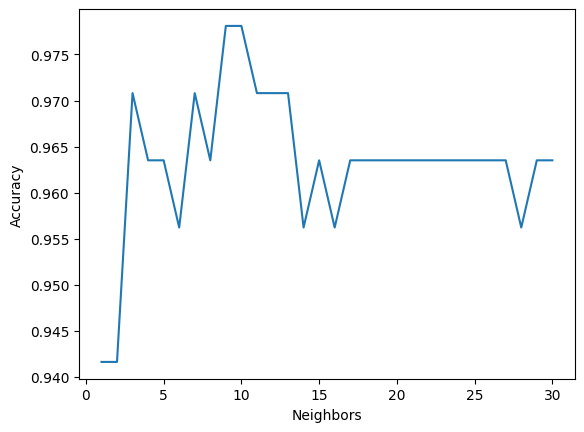

11


In [129]:
# Split training/test
# Testing for classes
y = df['classes'] 
X = df.drop('classes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize
# Normalizing data since the range is from 1-10, as for knn it does not make assumption of our data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose k (see top for function)
k = choose_k(y_test)

scores = []
ks = [x for x in range(1,31)]

for x in range(1,31):
    # Train
    knn = KNeighborsClassifier(n_neighbors=x, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    # Predict
    predicted_values = knn.predict(X_test_scaled)
    # Assess
    cm = confusion_matrix(y_test, predicted_values)
    tp,fp,fn,tn = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
    accuracy = (tp + tn) / (tp+fp+fn+tn)
    scores.append(accuracy)

plt.plot(ks, scores)
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.show()
print(k)

Plotting range from 1 - 30 for k values, seeing that k-cal function suggest 11. 
From the plot i would estimate that k = 11 is a good estimate for this scenerio. 